<a href="https://colab.research.google.com/github/wavallejol/Equilibrium/blob/main/Protein_Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

🔴  🔴  🔴 ⬇️ **Primero importaremos las librerias que utilizaremos** ⬇️ 🔴  🔴  🔴

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# **Equilibrio Termidinámico de Proteínas**
***William Vallejo***
# **Objetivos**
 
 
1.   Obtener la curva de estabilidad termodinámica de un proteína desde un foramlismo clásico.
2. Determinar el efecto de diferentes parámetros termodinámicos sobre la curva de estabilidad termodinámica.
---

#***Introducción***

Las <a href="https://es.wikipedia.org/wiki/Prote%C3%ADna"> proteínas </a> son compuestos macrociclicos formados por cadenas lineales de aminoacidos. La organización confomracional de estas cadenas da origena diferentes tipos de estructuras para las proteinas: 

(i) primaria: cadena lineal de de aminoacidos formado la cadena polipetidica.
(ii) secundaria:  
(iii) <a href="hhttps://es.wikipedia.org/wiki/Estructura_terciaria_de_las_prote%C3%ADnas"> estructura terciaria </a> de las proteínas se forma sobre la disposición de la estructura secundaria de un polipéptido al plegarse sobre sí misma originando una conformación globular.
(iv) Cuaternaria: Estructura tridimensional de multiples polipeptidos. Las conformaciones tridimensionales permiten que las proteínas participen en todo tipo de reacciones bioquímicas. Cuando una proteína pierde su conformación estable de plegamiento (estado nativo) se dice que la proteína sufre <a href="https://es.wikipedia.org/wiki/Desnaturalizaci%C3%B3n_(bioqu%C3%ADmica)"> desnaturalización </a> el estado de plegamiento de las proteinas se encuentra en equilibrio con diferente tipo de conformaciones que son inactivas (en conjunto representan el estado desnaturalización). Una aproximación inicial a este equilibrio proteína plegada - proteína desnaturalizada corresponde precisamente a dos estados termodinámicos en equilibrio:

$\small N \rightleftharpoons D \kern 2pc (1)$

Donde $\small D $ representan la protína desnaturalizada y $\small N $ la proteina nativa (plegada). La figura 1 muestra en esquema general de este proceso.
<center>

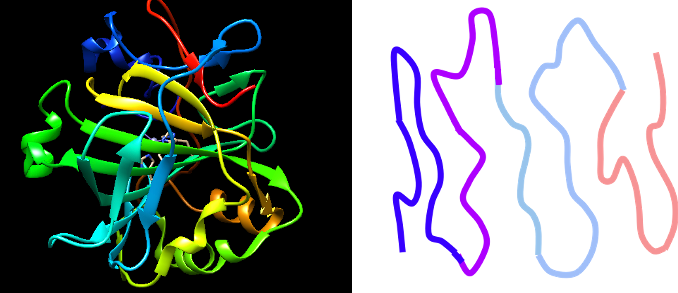
 
 Figura 1. Aproximación proceso de desmaturalización. imagen izquierda proteían estado nativo fuente <a href="https://www.rcsb.org/search?request=%7B%22query%22%3A%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22terminal%22%2C%22service%22%3A%22text%22%2C%22parameters%22%3A%7B%22attribute%22%3A%22struct_keywords.text%22%2C%22operator%22%3A%22contains_phrase%22%2C%22value%22%3A%22globular%20protein%2C%20LYASE%22%7D%7D%5D%2C%22logical_operator%22%3A%22and%22%7D%5D%2C%22logical_operator%22%3A%22and%22%2C%22label%22%3A%22text%22%7D%5D%2C%22logical_operator%22%3A%22and%22%7D%2C%22return_type%22%3A%22entry%22%2C%22request_options%22%3A%7B%22paginate%22%3A%7B%22start%22%3A0%2C%22rows%22%3A25%7D%2C%22scoring_strategy%22%3A%22combined%22%2C%22sort%22%3A%5B%7B%22sort_by%22%3A%22score%22%2C%22direction%22%3A%22desc%22%7D%5D%7D%2C%22request_info%22%3A%7B%22query_id%22%3A%22ba82112921c75497b5abe28e67e22cf8%22%7D%7D"> RSCB Protein Data Bank </a> , imagen derecha cadena polipéptidica. Fuente imagen <a href="https://en.wikipedia.org/wiki/Denaturation_(biochemistry)#/media/File:Process_of_Denaturation.svg"> wikipedia </a> 

</center>

La constante de equilibrio para este sistema sería:

$\small k_D=\frac{f_D}{f_N} \kern 2pc (2)$

Donde $\small f_D$ corresponde a la fracción de proteína denaturalizada y $\small f_D$ corresponde a la fracción de proteína en estado nativo. 

La ecuación de "Gibbs-Helmholtz" permite obtener el valor de la energía libre de Gibbs ($\small \Delta G$) como función de la temperatura para el equilibrio idealizado mostrado en (1):

$\small \Delta G=\Delta H(1-\frac{T}{T_m})-\Delta C_p(T_m-T+Tln(\frac{T}{T_m})) \kern 2pc (3)$

Donde $\small T_m$ representan la temperatura a la cual $\small [N]=[D]$. $\small \Delta H $ representa el cambio de entalpía del proceso de desnaturalización y $\small \Delta C_p $ corresponde a la capacidad calorifica. La representación gráfica  de $\small \Delta G$ se conoce como curva de estabilidad termodinámica y nos permite conocer bajo que condiciones de temperatura la proteina en estado nativo sera estable.



#***Curva de Estabilidad***

En esta actividad obtendremos la curva de estabilidad para una proteína utilizando la ecuación (3).

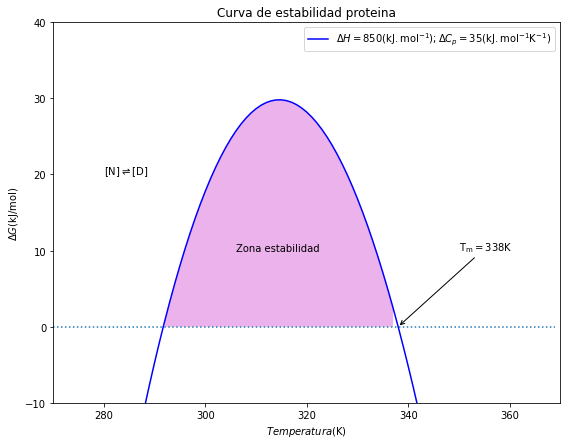

In [2]:
Cp=35
T=np.arange(270,370,1)
Go=np.zeros(100)
Tm=338
H=850
G=H*(1-T/Tm)-Cp*(Tm-T+T*(np.log(T/Tm)))  
k=np.exp((-G*1000)/(8.314*T))
fn=1/(1+k)
fu=1-fn

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(T,np.zeros(100), linestyle='dotted')
plt.plot(T,G, color="b", label=r"$ {\Delta H= 850(\mathrm{kJ.mol^{-1}})} $"+
                            r"$ {; \Delta C_p= 35(\mathrm{kJ.mol^{-1}K^{-1}})} $")   
plt.fill_between(T, G, 0, where=(G > 0), facecolor='m', alpha=0.3)   
plt.title("Curva de estabilidad proteina")            
plt.ylabel(r"$ {\Delta G (\mathrm{kJ/mol})} $")                    
plt.xlabel(r"$ {Temperatura (\mathrm{K})} $")         
plt.ylim(-10,40)                                        
plt.xlim(270,370)                                   
plt.legend()
plt.annotate(r"$ {\mathrm{T_{m}=338K}} $", xy=(338,0),
            arrowprops=dict(arrowstyle="->"),
            xytext=(350,10))
plt.annotate("Zona estabilidad", xy=(290,0),
            xytext=(306,10))
plt.annotate(r"$ {\mathrm{[N]\rightleftharpoons [D]}} $", xy=(290,0),
            xytext=(280,20))
plt.show()

#***Fracción de proteína desnaturalizada***

A Partir de los valores de la K de equilibrio (2) es posible obtener la fracción molar de proteína en estado nativo $(\small f_N)$ y la fracción de proteína desnaturalizada $(\small f_D)$:

$\small f_N + f_D = 1 \kern 2pc (4)$

Remplazando (4) en (2):

$\small k=\frac{1-f_N}{f_N} \kern 2pc (5)$

$\small f_N=\frac{1}{1+k} \kern 2pc (6)$

A partir de los valores de k en función de la temperatura es posible la fracción molar de proteínas como función de la temperatura.

In [5]:
Cp=35
T=np.arange(270,370,0.1)
Go=np.zeros(1000)
Tm=330
H=900
G=H*(1-T/Tm)-Cp*(Tm-T+T*(np.log(T/Tm)))  
Go=np.zeros(100)
k=np.exp((-G*1000)/(8.314*T))
fn=1/(1+k)
fu=1-fn

fig = go.Figure()

fig.add_trace(go.Scatter(x=T, y=fn,
                    mode='lines',
                    name="$ \mathrm{f_N} $"))

fig.add_trace(go.Scatter(x=T, y=fu,
                    mode='lines',
                    name="$ \mathrm{f_U} $"))

fig.update_layout(
    title="Fracción de proteína",
    xaxis_title=r"$ {Temperatura (\mathrm{K})} $",
    yaxis_title=r"$ \mathrm{x} $",
    yaxis_range=[-0.1,1.1],
    xaxis_range=[320,340],
    width=600, height=600
)
fig.show()

#***Actividad 1: Efecto del parámetro $\small T_m$***

La [temperatura medía](https://en.wikipedia.org/wiki/Denaturation_midpoint) $\small T_m$ de una proteína es definada como la temperatura a la cual se cumple la expresión$\small [N]=[D]$. En el siguiente celda de código simularemoa el efecto del valor de 3 valores $\small T_m$ sobre la forma de la curva de estabilidad.

1. Corre la simulación, descarga la imagen y trata de explicar el efecto de $\small T_m$ sobre la forma de la curva de estabilidad.

In [6]:
import numpy as np
import plotly.graph_objects as go 

Tm=np.array([330,338, 345])
T=np.arange(270,370,1)
Go=np.zeros(100)
H=800
G=H*(1-T/Tm[0])-Cp*(Tm[0]-T+T*(np.log(T/Tm[0])))      
G1=H*(1-T/Tm[1])-Cp*(Tm[1]-T+T*(np.log(T/Tm[1])))
G2=H*(1-T/Tm[2])-Cp*(Tm[2]-T+T*(np.log(T/Tm[2])))        

fig = go.Figure()
fig.add_trace(go.Scatter(x=T, y=G,
                    mode='lines',
                    name='Tm = 330 K'))
fig.add_trace(go.Scatter(x=T, y=G1,
                    mode='lines',
                    name='Tm = 338 K'))
fig.add_trace(go.Scatter(x=T, y=G2,
                    mode='lines',
                    name='Tm = 345 K'))
fig.add_trace(go.Scatter(x=T, y=Go,
                    mode='lines',
                    name="$ {\Delta G=0} $")) 
fig.update_layout(
    title="Curva de estabilidad proteinas - Efecto Tm",
    xaxis_title=r"$ {Temperatura (\mathrm{K})} $",
    yaxis_title=r"$ {\Delta G (\mathrm{kJ.mol^{-1}})} $",
    yaxis_range=[-10,40],
    xaxis_range=[270,360],
    width=700, height=500
)
fig.show()

#***Actividad 4: Efecto Entalpico***

Otro de los parámetros que afectan la curva de estabilidad termodinámica de una proteína es la [Entalpía](https://en.wikipedia.org/wiki/Enthalpy) $\small \Delta H$. En el siguiente celda de código simulatermoa el efecto del valor de $\small \Delta H$ sobre la forma de la curva de estabilidad.

1.  Corre la simulación descarga la imagen y trata de explicar el efecto de $\small \Delta H$ sobre la forma de la curva de estabilidad.

In [7]:
import numpy as np
import plotly.graph_objects as go 

H=np.array([850,900, 950])
T=np.arange(270,370,1)
Go=np.zeros(100)
Cp=35
Tm=330

G=H[0]*(1-T/Tm)-Cp*(Tm-T+T*(np.log(T/Tm)))      
G1=H[1]*(1-T/Tm)-Cp*(Tm-T+T*(np.log(T/Tm)))
G2=H[2]*(1-T/Tm)-Cp*(Tm-T+T*(np.log(T/Tm)))        

fig = go.Figure()
fig.add_trace(go.Scatter(x=T, y=G,
                    mode='lines',
                    name='$ {\Delta H = 850 kJ/mol} $'))
fig.add_trace(go.Scatter(x=T, y=G1,
                    mode='lines',
                    name='$ {\Delta H = 900 kJ/mol} $'))
fig.add_trace(go.Scatter(x=T, y=G2,
                    mode='lines',
                    name='$ {\Delta H = 950 kJ/mol} $'))
fig.add_trace(go.Scatter(x=T, y=Go,
                    mode='lines',
                    name="$ {\Delta G=0} $")) 
fig.update_layout(
    title="Curva de estabilidad proteinas - Efecto entalpico",
    xaxis_title=r"$ {Temperatura (\mathrm{K})} $",
    yaxis_title=r"$ {\Delta G (\mathrm{kJ.mol^{-1}})} $",
    yaxis_range=[-10,40],
    xaxis_range=[270,340],
    width=700, height=500
)
fig.show()

#***Actividad e: Efecto valor de $\small C_p$***

Otro de los parámetros que afecta la curva de estabilidad termodinámica de una proteína es la [calor especifico](https://es.wikipedia.org/wiki/Calor_espec%C3%ADfico) $\small C_p$. En el siguiente celda de código simulatermoa el efecto del valor de $\small C_p$. sobre la forma de la curva de estabilidad.

1. Corre la simulación descarga la imagen y trata de explicar el efecto de $\small C_p$ sobre la forma de la curva de estabilidad.
2. A partir de la lectura del articulo citado en la referencia ([Romero et. al 2018](http://www.scielo.org.mx/pdf/eq/v29n3/0187-893X-eq-29-03-3.pdf)), realiza un pequeña explicación de la técnica de caracterización de Calorimetria de Barrido Diferencial.


In [ ]:
import numpy as np
import plotly.graph_objects as go 

Cp=np.array([45,30, 25])
T=np.arange(270,370,1)
Go=np.zeros(100)
Tm=330
H=850

G=H*(1-T/Tm)-Cp[0]*(Tm-T+T*(np.log(T/Tm)))      
G1=H*(1-T/Tm)-Cp[1]*(Tm-T+T*(np.log(T/Tm)))
G2=H*(1-T/Tm)-Cp[2]*(Tm-T+T*(np.log(T/Tm)))        

fig = go.Figure()
fig.add_trace(go.Scatter(x=T, y=G,
                    mode='lines',
                    name='$ {\Delta C_p = 45 kJ/K.mol} $'))
fig.add_trace(go.Scatter(x=T, y=G1,
                    mode='lines',
                    name='$ {\Delta C_p = 25 kJ/K.mol} $'))
fig.add_trace(go.Scatter(x=T, y=G2,
                    mode='lines',
                    name='$ {\Delta C_p = 45 kJ/K.mol} $'))
fig.add_trace(go.Scatter(x=T, y=Go,
                    mode='lines',
                    name="$ {\Delta G=0} $")) 
fig.update_layout(
    title="Curva de estabilidad proteinas - Efecto Cp",
    xaxis_title=r"$ {Temperatura (\mathrm{K})} $",
    yaxis_title=r"$ {\Delta G (\mathrm{kJ.mol^{-1}})} $",
    yaxis_range=[-10,50],
    xaxis_range=[270,330],
    width=700, height=500
)
fig.show()

---
#***Enlaces recomendados***

*  Python Plotly: <a href="https://plotly.com/python/reference/">Python Figure Reference</a>

---

#***Referencias***

*  S. Romero. D. Fernández, M. Costas. Estabilidad Termodinámica de Proteínas. $\small Comp. Educación Química 2018, 29:3, 1-17.$ <a href="http://www.scielo.org.mx/pdf/eq/v29n3/0187-893X-eq-29-03-3.pdf"> 10.22201/fq.18708404e.2018.3.64699</a>
*  J. Sancho. Estructura de Macromoléculas. [Estabilidad y plegamiento de las proteínas:](http://jsancho.bifi.es/estructuramacromoleculas/leccion-8-estabilidad-y-plegamiento-de-las-proteinas/")
---
